# Classical High Order Methods

### Table of contents
 1. Chapter 2: Classical Methods
    1. [Section 1.1: Runge Kutta](#RK)
    1. [Section 1.2: Multistep methods](#multistep)

* How to obtain generalizations of the Euler methods?
* How can we obtain higher order of accuracy $\Delta t^p$?

![Generalization of Euler](images/chapter2/generalizeEuler.png)

## Runge Kutta Methods <a id='RK'></a>

The basic idea of Runge--Kutta methods is to introduce further stages inside the computation of one step, in order to achieve higher order of accuracy.

### $\theta$ method

For example consider the following method:

$$
y^{*}=y^n +\theta \Delta t F(t^n,y^n)\\
y^{n+1} = y^n +\Delta t \left( \frac{2\theta-1}{2\theta}F(t^n,y^n) + \frac{1}{2\theta} F(t^n+\theta\Delta t,y^*) \right).
$$

We introduced 1 extra stage. Do we get an extra order?

#### Taylor expansion for local truncation
Suppose that $y^n=y(t^n)$, define $t^*=t^n+\theta \Delta t$, and suppose that $F$ does not depends explicitly on time,

$$
\begin{align}
y(t^{n+1})&=y^n + \Delta t y'(t^n) + \frac{\Delta t^2}{2} y''(t^n) + \mathcal{O}(\Delta t^3)\\
y(t^{*})&=y^n + \theta\Delta t y'(t^n) + \frac{\theta^2\Delta t^2}{2} y''(t^n) + \mathcal{O}(\Delta t^3)\\
y^{*} &= y^n + \theta \Delta t F(y^n) = y(t^*)+ \mathcal{O}(\Delta t^2)\\
y^{n+1} &= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}F(t^n,y^n) + \frac{1}{2\theta} F(y^*) \right)\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} F(y^n+\theta \Delta t y'(t^n)) \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} F(y^n)+\frac{1}{2\theta} \frac{dF}{dy}(y^n)\theta \Delta t y'(t^n)  \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( \frac{2\theta-1}{2\theta}y'(t^n) + \frac{1}{2\theta} y'(t^n)+\frac{1}{2\theta} \frac{dF}{dt}(y^n)\theta \Delta t   \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( y'(t^n)+\frac{1}{2\theta} \frac{d}{dt}(y'(t^n))\theta \Delta t   \right) + \mathcal{O}(\Delta t^3)\\
&= y^n +\Delta t \left( y'(t^n)+\frac{1}{2} y''(t^n) \Delta t   \right) + \mathcal{O}(\Delta t^3)=y(t^{n+1})+\mathcal{O}(\Delta t^3).
\end{align}
$$

So, second order in the **global** error.

### General formulation
A general Runge--Kutta method with $S$ stages can be written using a Butcher tableau
$$
\begin{array}
{c|c}
c&A\\
\hline
& b^T
\end{array}
$$
where $A\in \mathbb R^{S\times S},\, b,c\in\mathbb R^S$, in the following formulation

$$
\begin{cases}
y^{(k)}=y^n + \Delta t \sum_{j=1}^S a_{kj} F(t^n+c_j\Delta t,y^{(j)}), \quad k=1,\dots, S,\\
y^{n+1} = y^n+ \Delta t \sum_{j=1}^S b_{j} F(t^n+c_j\Delta t,y^{(j)})
\end{cases}
$$

To be an **explicit** scheme $A$ must be a strictly low-triangular matrix, i.e., $a_{ij}=0$ if $j\geq i$. 

#### Example $\theta$ scheme
The $\theta$ scheme we have seen before can be written as

$$
\begin{array}
{c|cc}
0\\
\theta & \theta\\
\hline
& \frac{2\theta -1}{2\theta} &\frac{1}{2\theta} 
\end{array}
$$

We see that the scheme is explicit, because there is nothing on the top right of $A$.

### Order of explicit RK schemes
How do we know that a RK scheme has a certain order?
For $\theta $ method we have written the Taylor expansion up to the order we were expecting and we matched the coefficients of the exact solution with the one of the approximated solutions at all the steps.

If one wants to generalize this conditions using the Taylor expansion, it takes long, but you can get to similar results

![Generalization of Euler](images/chapter2/orderCOnditionRK4.png)
Where the first condition is for order 1 RK methods,

the first 2 conditions are for order 2 RK methods,

the first 4 conditions are for order 3 RK methods,

all the 8 conditions are for order 4 RK methods.


* How can the conditions be computed without doing the Taylor expansions?

#### Trees 
A very smart way of computing all the conditions is given by combinatorial arguments that can be represented as trees. 
You can find the proof in [Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)

![Tree Order](images/chapter2/treeOrder.png)

A tree is an object with nodes and branches as in figure, with **leaves** on top (nodes without further branches outward going) and a **root** at the bottom (the node with only branches outgoing).

The **order** of a tree is the number of nodes in that tree.

A RK scheme is of order $p$ if all the trees of order less or equal to $p$ verify certain conditions.

All the conditions that must verified are of the type $\Phi(a_{ij},b_i,c_j)=\frac{1}{\gamma}$ polynomial in the coefficients of the Butcher tableau equal to the inverse of an integer. 
For every tree is very easy to compute such polynomial $\Phi$ and the integer $\gamma$.

Here is an example:
![Tree Order](images/chapter2/treePoly.png)


For order 4 we have all these trees and conditions
![Tree Order](images/chapter2/treesOrder4.png)

Reminder: an explicit RK method with $S$ stages has $\frac{S^2+3S-2}{2}$ coefficients.

| Stages/Order  | Trees | Conditions | Explicit RK coefficient |
|---|---|---|---|
| 1  | 1  | 1  | 1  |
| 2  | 1  | 2  | 4  |
| 3  | 2  | 4  | 8  |
| 4  | 4  | 8  | 13  |
| 5  | 9  | 17  | 19  |
| 6  | 20 | 37  | 26  |
| 7  | 48 | 85     | 34  |
| 8  | 115 | 200   | 43  |
| 9  | 286 | 486   | 53  |
| 10 | 719 | 1205  | 64  |

Moreover, the solution of these conditions should be admissible. For example, there is no 5 stages 5th order explicit RK method, one needs 6 stages. As well, some of the relations may be redundant. Building higher order explicit Runge Kutta method is a challenge.

An extract of Butcher
![Higher Order Butcher](images/chapter2/orderVsStages.png)

#### Theorem 324C [Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)
For any positive integer $p$, an explicit RK method exists with order $p$ and $S$ stages, where
\begin{equation}
S=\begin{cases}
\frac{3p^2-10p+24}{8}, \quad & p \text{ even,}\\
\frac{3p^2-4p+9}{8}, \quad & p \text{ odd.}
\end{cases}
\end{equation}

| Order  | Stages  |
|---|---|
| 1  | 1  |
| 2  | 2  | 
| 3  | 3  |
| 4  | 4  | 
| 5  | 8  |
| 6  | 9  | 
| 7  | 16 |
| 8  | 17 |
| 9  | 27 | 
| 10 | 28 | 

Examples of explicit RK4
$$
\begin{array}
{c|cccc}
0\\
\frac{1}{2} & \frac{1}{2}\\
\frac{1}{2} &0 &\frac{1}{2} \\
1& 0& 0& 1\\
\hline
& \frac{1}{6} &\frac{1}{3} &\frac{1}{3} &\frac{1}{6} 
\end{array} \qquad  \begin{array}
{c|cccc}
0\\
\frac{1}{4} & \frac{1}{4}\\
\frac{1}{2} &0 &\frac{1}{2} \\
1& 1& -2& 2\\
\hline
& \frac{1}{6} &0 &\frac{2}{3} &\frac{1}{6} 
\end{array}
$$

An explicit RK5
$$
\begin{array}
{c|cccccc}
0\\
\frac{1}{4} & \frac{1}{4}\\
\frac{1}{4} &\frac{1}{8} &\frac{1}{8} \\
\frac{1}{2}& 0& 0& \frac{1}{2}\\
\frac{3}{4}& \frac{3}{16}& -\frac{3}{8}& \frac{3}{8}&\frac{9}{16}\\
1& -\frac{3}{7}& \frac{8}{7}& \frac{6}{7} & -\frac{12}{7} & \frac{8}{7}\\
\hline
& \frac{7}{90}&0 &\frac{32}{90} &\frac{12}{90} &\frac{32}{90}&\frac{7}{90} 
\end{array} 
$$

### Implicit RK schemes
The implicit RK schemes are defined as usual RK schemes and have at least a nonzero element in the upper triangular part of $A$. 
They have the advantage of requiring **less stages** (with respect to explicit RK) to obtain the order of accuracy required.

For example 

$$
\begin{array}
{c|cc}
\frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} &\frac{1}{4}-\frac{\sqrt{3}}{6}\\
\frac{1}{2}+\frac{\sqrt{3}}{6}  &\frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4}\\
\hline
& \frac{1}{2} &\frac{1}{2} 
\end{array}
$$

has order 4. 

There are clever ways of building implicit RK methods using well known high order accurate quadrature rules.

Take a quadrature rule of order $p$ with $S$ quadrature points $c_i \in [0,1]$, provided with $S$ interpolation polynomials $\varphi_i$, such that $\varphi_i(c_j)=\delta_{i,j}$ and

$$
y(t) = \sum_{i=1}^S \varphi_i(t) y(t^n+c_i\Delta t) + \mathcal{O}(\Delta t^{p+1}), \qquad \forall t \in [t^n,t^{n+1}].
$$

We can then define the $a_{ij}$ approximating 

$$
y^{(i)}=y^n+\int_{t^n}^{t^n+c_i\Delta t} F(t,y(t))dt\approx y^n+\sum_{j} \int_{t^n}^{t^n+c_i\Delta t} \varphi_j(t) dt F(t,y^{(j)})  
$$

so that

$$
a_{ij}:=\int_{t^n}^{t^n+c_i\Delta t} \varphi_j(t) dt
$$

and similarly 

$$
b_{j}:=\int_{t^n}^{t^{n+1}} \varphi_j(t) dt.
$$

This guarantees a high order quadrature rule also in the final step, keeping the right accuracy order in every step of the RK method.

Using Gauss--Legendre polynomials one gets $p=2s$, examples


$$
\begin{array}
{c|c}
\frac{1}{2} & \frac{1}{2}\\
\hline
s=1, p=2 & 1 
\end{array}
$$

$$
\begin{array}
{c|cc}
\frac{1}{2}-\frac{\sqrt{3}}{6} & \frac{1}{4} &\frac{1}{4}-\frac{\sqrt{3}}{6}\\
\frac{1}{2}+\frac{\sqrt{3}}{6}  &\frac{1}{4}+\frac{\sqrt{3}}{6} & \frac{1}{4}\\
\hline
s=2, p=4 & \frac{1}{2} &\frac{1}{2} 
\end{array}
$$

$$
\begin{array}
{c|ccc}
\frac{1}{2}-\frac{\sqrt{15}}{10} & \frac{5}{36} &\frac{2}{9}-\frac{\sqrt{15}}{15} &\frac{5}{36} -\frac{\sqrt{15}}{30} \\
\frac{1}{2} & \frac{5}{36}+\frac{\sqrt{15}}{24}  &\frac{2}{9}&\frac{5}{36} -\frac{\sqrt{15}}{24} \\
\frac{1}{2}+\frac{\sqrt{15}}{10}+\frac{\sqrt{15}}{30} & \frac{5}{36} &\frac{2}{9}+\frac{\sqrt{15}}{15} &\frac{5}{36}  \\
\hline
s=3, p=6 & \frac{5}{18} &\frac{4}{9} &\frac{5}{18} 
\end{array}
$$

Using Gauss--Lobatto or Radau points one decrease the order $p=2s-1$, but increases stability.

### Stability
As we have seen before for Euler, the stability can be evaluated on Dahlquist's equation

$$ y'=qy$$ 

with Re$(q)\leq 0$. Considering $z=\theta q$ we want to write the RK methods on this problem as 

$$
y^{n+1}=R(z)y^n
$$

and find the stability region $\mathcal S=\lbrace z\in \mathbb C : |R(z)|\leq 1\rbrace$.

It is actually very simple to write the stability function $R$ for these problems. 
Let $Y\in \mathbb R^S$ be the solution of the RK method at all the stages, namely, it solves

$$
Y=\mathbf{1}y^n + \Delta t q A Y
$$

or

$$
(I-zA)Y=\mathbf{1}y^n \quad \Leftrightarrow Y=(I-zA)^{-1}\mathbf{1} y^n
$$

with $\mathbf 1$ the vector of dimension $S$ with all entries equal to 1.

Substituting this into the final update, we have

$$
y^{n+1} = y^n + z b^{T}Y=y^n + z b^T(I-zA)^{-1}\mathbf{1} y^n = (1+ z b^T(I-zA)^{-1}\mathbf{1}) y^n$$


which gives a way of computing the stability region very efficiently with 

$$
R(z) =1+ z b^T(I-zA)^{-1}\mathbf{1}.
$$

[[0 0 0 0]
 [1/2 0 0 0]
 [0 1/2 0 0]
 [0 0 1 0]]
[1/6 1/3 1/3 1/6]


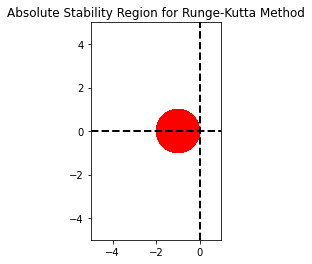

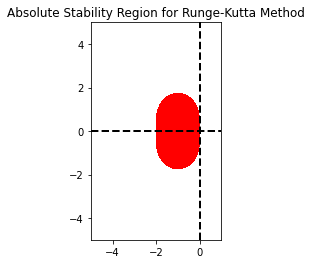

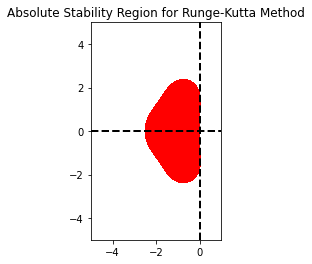

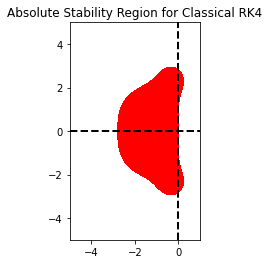

In [71]:
from nodepy import rk
import numpy as np

A=np.array([[0,0],[1/2,0]])
b=np.array([0,1])
rk2 = rk.ExplicitRungeKuttaMethod(A,b)

A=np.array([[0]])
b=np.array([1])
rk1 = rk.ExplicitRungeKuttaMethod(A,b)


A=np.array([[0,0,0],[2/3,0,0],[1/3,1/3,0]])
b=np.array([1/4,0,3/4])
rk3 = rk.ExplicitRungeKuttaMethod(A,b)

rk44=rk.loadRKM('RK44')


rk1.plot_stability_region(bounds=[-5,1,-5,5])
rk2.plot_stability_region(bounds=[-5,1,-5,5])
rk3.plot_stability_region(bounds=[-5,1,-5,5])
rk44.plot_stability_region(bounds=[-5,1,-5,5])

print(rk44.A)
print(rk44.b)

### Stability for implicit method
Implicit methods are able to deal with stiff problems, hence, other types of stability are more interesting in this situation.

##### A-stability 
A methods is A-stable if $|R(z)|\leq 1$ whenever Re$(z)\leq 0$.

##### L-stability
A method is L-stable if it is A-stable and $R(\infty)=0$.

This gives better stability conditions in case of stiff problems.

Radau and Lobatto implicit RK methods are L-stable, while Gauss--Legendre are only A-stable.

One can write down the conditions for RK scheme to have these stabilities. [see Butcher](https://onlinelibrary.wiley.com/doi/book/10.1002/9781119121534)

In [17]:
from ODEproblems import ODEproblem
pr=ODEproblem("Robertson")


array([1., 0., 0.])

In [47]:
## explicit RK method
def explicitRK(flux, tspan, y_0, A, b, c):
    # Solving u'=F(u,t)
    # input: flux=F, tspan is a vector of times determining the RK steps
    # input: y_0 the initial condition
    # input: A,b,c are matrix and vectors of RK methods
    N_time=len(tspan)  # N+1
    dim=len(y_0)          # S
    y=np.zeros((dim,N_time))    # initializing the variable of solutions    
    y[:,0]=y_0                 # first timestep 
    S=np.shape(A)[0]
    u=np.zeros((dim,S))       # Internal stages
    Fu=np.zeros((dim,S))       # Flux at internal stages
    for n in range(N_time-1):    # n=0,..., N-1
        delta_t=tspan[n+1]-tspan[n]
        for k in range(S):
            u[:,k]=y[:,n] 
            for j in range(k):
                u[:,k] =u[:,k]+ delta_t*A[k,j]*Fu[:,j]
            Fu[:,k] = flux(u[:,k],tspan[n]+delta_t*c[k])
        y[:,n+1]=y[:,n]
        for j in range(S):
            y[:,n+1]=y[:,n+1]+delta_t*b[j]*Fu[:,j]
    return tspan, y 

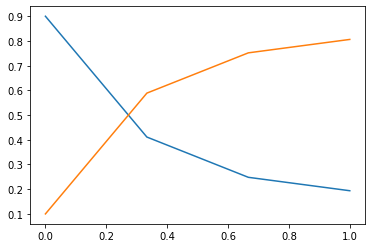

In [54]:
import matplotlib.pyplot as plt
pr=ODEproblem("linear_system2")
t_span=np.linspace(0,pr.T_fin,4)
rk44=rk.loadRKM('RK44')
tt,uu=explicitRK(pr.flux,t_span,pr.u0,rk44.A,rk44.b,rk44.c)
plt.plot(tt,uu[0,:])
plt.plot(tt,uu[1,:])

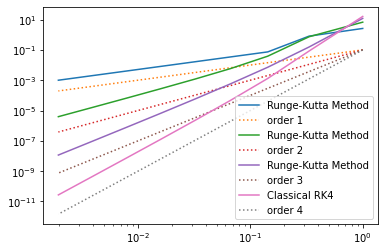

In [72]:
def error(tt,yy):
    errors=np.zeros(len(tt))
    for it, t in enumerate(tt):
        errors[it]=np.linalg.norm(yy[:,it]-pr.exact(yy[:,0],t))
    return np.mean(errors)

Ns=[2**k for k in range(1,10)]
solvers=[rk1,rk2,rk3,rk44]

errorEx=np.zeros((len(solvers),len(Ns)))
dts=    np.zeros(len(Ns))



for iN, N in enumerate(Ns):
    tspan=np.linspace(0,pr.T_fin,N)
    dts[iN]=tspan[1]-tspan[0]
    for iS, rk in enumerate(solvers):
        tt,yy=explicitRK(pr.flux,tspan,pr.u0,rk.A,rk.b,rk.c)
        errorEx[iS,iN]=error(tt,yy)

plt.figure()
for iS, rk in enumerate(solvers):
    plt.loglog(dts,errorEx[iS,:],label=rk.name)
    plt.loglog(dts,0.1*dts**(rk.order()),":", label="order %d"%(rk.order()))
plt.legend()

## Multistep Methods <a id='multistep'></a>

1. Properties ODEs (conservation, energy/entropy conservation, positivity) (getting a good approximation)
1. existence, uniqueness
1. simple schemes: explicit Euler, implicit Euler (positive pres/TVD the only one), properties, stability, accuracy.
1. RK methods. High order, how to build them (order condition), properties.
1. Multistep methods
1. SSPRK methods
1. Implicit Euler is the only implicit SSP method
1. DeC
    1. Definition, theorem, proof
    1. RK translation
    1. Extension to PDE
    1. Stability analysis
1. ADER
1. modified Patankar schemes
1. relaxation schemes